Dataset: The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
df = pd.read_csv('avocado.csv')
df.head(150)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,41,2015-03-15,1.24,693698.13,53400.14,395837.01,46596.22,197864.76,193130.90,4733.86,0.0,conventional,2015,BaltimoreWashington
146,42,2015-03-08,1.26,657745.90,55284.80,367670.93,42267.91,192522.26,188374.49,4147.77,0.0,conventional,2015,BaltimoreWashington
147,43,2015-03-01,1.16,770115.24,59039.85,498872.67,40241.65,171961.07,168224.20,3736.87,0.0,conventional,2015,BaltimoreWashington
148,44,2015-02-22,1.11,749845.79,50501.07,445970.56,62611.61,190762.55,186976.97,3785.58,0.0,conventional,2015,BaltimoreWashington


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [10]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [16]:
filt=df['region']=="Albany"

In [17]:
print(filt)

0         True
1         True
2         True
3         True
4         True
         ...  
18244    False
18245    False
18246    False
18247    False
18248    False
Name: region, Length: 18249, dtype: bool


In [26]:
print(df['AveragePrice'].min())
print(df['AveragePrice'].median())
print(df['AveragePrice'].max())

0.44
1.37
3.25


In [28]:
df['AveragePrice'].describe()

count    18249.000000
mean         1.405978
std          0.402677
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: AveragePrice, dtype: float64

In [27]:
higher_price_filt=df['AveragePrice']>=1.37
lower_price_filt=df['AveragePrice']<1.37


In [29]:
regiongroup=df.groupby(["region"])

In [33]:
regiongroup['AveragePrice'].median()

region
Albany                 1.560
Atlanta                1.230
BaltimoreWashington    1.550
Boise                  1.220
Boston                 1.555
BuffaloRochester       1.480
California             1.375
Charlotte              1.585
Chicago                1.610
CincinnatiDayton       1.100
Columbus               1.180
DallasFtWorth          1.040
Denver                 1.165
Detroit                1.225
GrandRapids            1.505
GreatLakes             1.340
HarrisburgScranton     1.475
HartfordSpringfield    1.800
Houston                0.980
Indianapolis           1.290
Jacksonville           1.470
LasVegas               1.265
LosAngeles             1.140
Louisville             1.230
MiamiFtLauderdale      1.420
Midsouth               1.400
Nashville              1.105
NewOrleansMobile       1.340
NewYork                1.780
Northeast              1.640
NorthernNewEngland     1.510
Orlando                1.470
Philadelphia           1.625
PhoenixTucson          1.225
Pittsbu

In [39]:
df['average revenue']=(df['AveragePrice']*df['Total Volume'])

In [48]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,average revenue
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,85434.7046
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,74083.9230
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,109944.8046
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,85311.5220
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,65330.6880


In [115]:
pd.set_option('display.float_format', str)


In [116]:
df.groupby(['region'])['average revenue'].sum()

region
Albany                 21766723.75080002
Atlanta                93793368.99569999
BaltimoreWashington   179908448.05660012
Boise                  15346666.46540001
Boston                126542904.75340019
BuffaloRochester      31545094.179499988
California            1121414026.5127017
Charlotte             45743042.400000006
Chicago               179110584.75520024
CincinnatiDayton       44989579.66150001
Columbus              31562947.476400018
DallasFtWorth         175609297.87060001
Denver                145982845.53089994
Detroit                 69126241.6585001
GrandRapids           37851238.921499975
GreatLakes             688661844.2662994
HarrisburgScranton    52954718.512099996
HartfordSpringfield    71186448.72960013
Houston               165571340.22640005
Indianapolis           34024736.61219998
Jacksonville           33483957.55640001
LasVegas               54809053.69559997
LosAngeles                484227610.4051
Louisville            17495546.930100005
MiamiFtLa

In [53]:
filt_2018=df['Date'].str.startswith('2018')
filt_2017=df['Date'].str.startswith('2017')
filt_2016=df['Date'].str.startswith('2016')
filt_2015=df['Date'].str.startswith('2015')


In [56]:
import numpy as np
yearconditions=[df['Date'].str.startswith('2018'),df['Date'].str.startswith('2017'), df['Date'].str.startswith('2016'), df['Date'].str.startswith('2015')]
yearvalues=['2018','2017','2016','2015']
df['Year']=np.select(yearconditions, yearvalues)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,average revenue,Year
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,85434.7046,2015
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,74083.9230,2015
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,109944.8046,2015
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,85311.5220,2015
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,65330.6880,2015


In [117]:
df.groupby(['region','Year'])['average revenue'].median()

region               Year
Albany               2015           23767.7428
                     2016   37661.232149999996
                     2017           51085.5651
                     2018    61085.03584999999
Atlanta              2015   174872.80264999997
                     2016   229830.28280000002
                     2017   255047.02400000003
                     2018         296468.70305
BaltimoreWashington  2015          332623.6295
                     2016   423121.72774999996
                     2017   490534.50690000004
                     2018         612838.57745
Boise                2015           29242.4764
                     2016          27698.46035
                     2017           42361.7916
                     2018           53623.2865
Boston               2015          215220.1637
                     2016   300747.12484999996
                     2017   324907.87015000003
                     2018         405172.73805
BuffaloRochester     2015         

In [60]:
df.groupby(['region','Year'])['Total Volume'].median()

region            Year
Albany            2015      21312.420
                  2016      30353.820
                  2017      30476.200
                  2018      46598.205
Atlanta           2015     173802.545
                             ...     
West              2018    3353071.060
WestTexNewMexico  2015     519028.450
                  2016     174380.535
                  2017     585017.685
                  2018     438689.795
Name: Total Volume, Length: 216, dtype: float64

In [64]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [67]:
organic_filt=df['type']=="organic"
conventional_filt=df['type']=="conventional"

In [74]:
df.groupby('type').size()

type
conventional    9126
organic         9123
dtype: int64

In [82]:
typecondition=[df['type'].str.contains('organic'),df['type'].str.contains('conventional')]
typevalue=[1,0]
df['Organic']=np.select(typecondition, typevalue)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,average revenue,Year,Organic
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,85434.7046,2015,0
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,74083.9230,2015,0
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,109944.8046,2015,0
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,85311.5220,2015,0
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,65330.6880,2015,0


In [84]:
pd.set_option('display.max_rows', 500)


In [118]:
df.groupby(['region','Year', 'type'])['average revenue'].sum()
#Sum of average revenue from organic vs. non-organic avocados displayed according to region and year

region               Year  type        
Albany               2015  conventional    4637022.669800001
                           organic        127490.94510000006
                     2016  conventional    6849349.098600001
                           organic        159869.91110000006
                     2017  conventional         7682899.4341
                           organic        264817.34120000014
                     2018  conventional   1967261.2358000004
                           organic                78013.1151
Atlanta              2015  conventional        23971645.8966
                           organic               543816.2864
                     2016  conventional   26256010.577000003
                           organic         777925.2067999999
                     2017  conventional   32558439.864900004
                           organic        1345950.4799999997
                     2018  conventional   8033642.9449000005
                           organic           

In [91]:
df.groupby(['region','Year', 'Organic'])['AveragePrice'].mean()
#Average price of organic vs. non-organic avocados displayed according to region and year

region               Year  Organic
Albany               2015  0          1.171923
                           1          1.905577
                     2016  0          1.345769
                           1          1.722115
                     2017  0          1.526415
                           1          1.749245
                     2018  0          1.343333
                           1          1.528333
Atlanta              2015  0          1.052308
                           1          1.708846
                     2016  0          0.972885
                           1          1.455385
                     2017  0          1.192453
                           1          1.665094
                     2018  0          1.010000
                           1          1.567500
BaltimoreWashington  2015  0          1.168077
                           1          1.569615
                     2016  0          1.356538
                           1          1.818654
                     2017

In [92]:
df.groupby(['region', 'Organic'])['AveragePrice'].mean()
#Average price of organic vs. non-organic avocados displayed according to region.


region               Organic
Albany               0          1.348757
                     1          1.773314
Atlanta              0          1.068817
                     1          1.607101
BaltimoreWashington  0          1.344201
                     1          1.724260
Boise                0          1.076036
                     1          1.620237
Boston               0          1.304379
                     1          1.757396
BuffaloRochester     0          1.382308
                     1          1.651361
California           0          1.105444
                     1          1.685207
Charlotte            0          1.275089
                     1          1.936982
Chicago              0          1.369349
                     1          1.744201
CincinnatiDayton     0          1.015503
                     1          1.402899
Columbus             0          1.066272
                     1          1.439290
DallasFtWorth        0          0.846450
                     1      

In [106]:
#Where are avocados most expensive?
avocado_prices=df.groupby(['region'])['AveragePrice'].mean()
type(avocado_prices)


pandas.core.series.Series

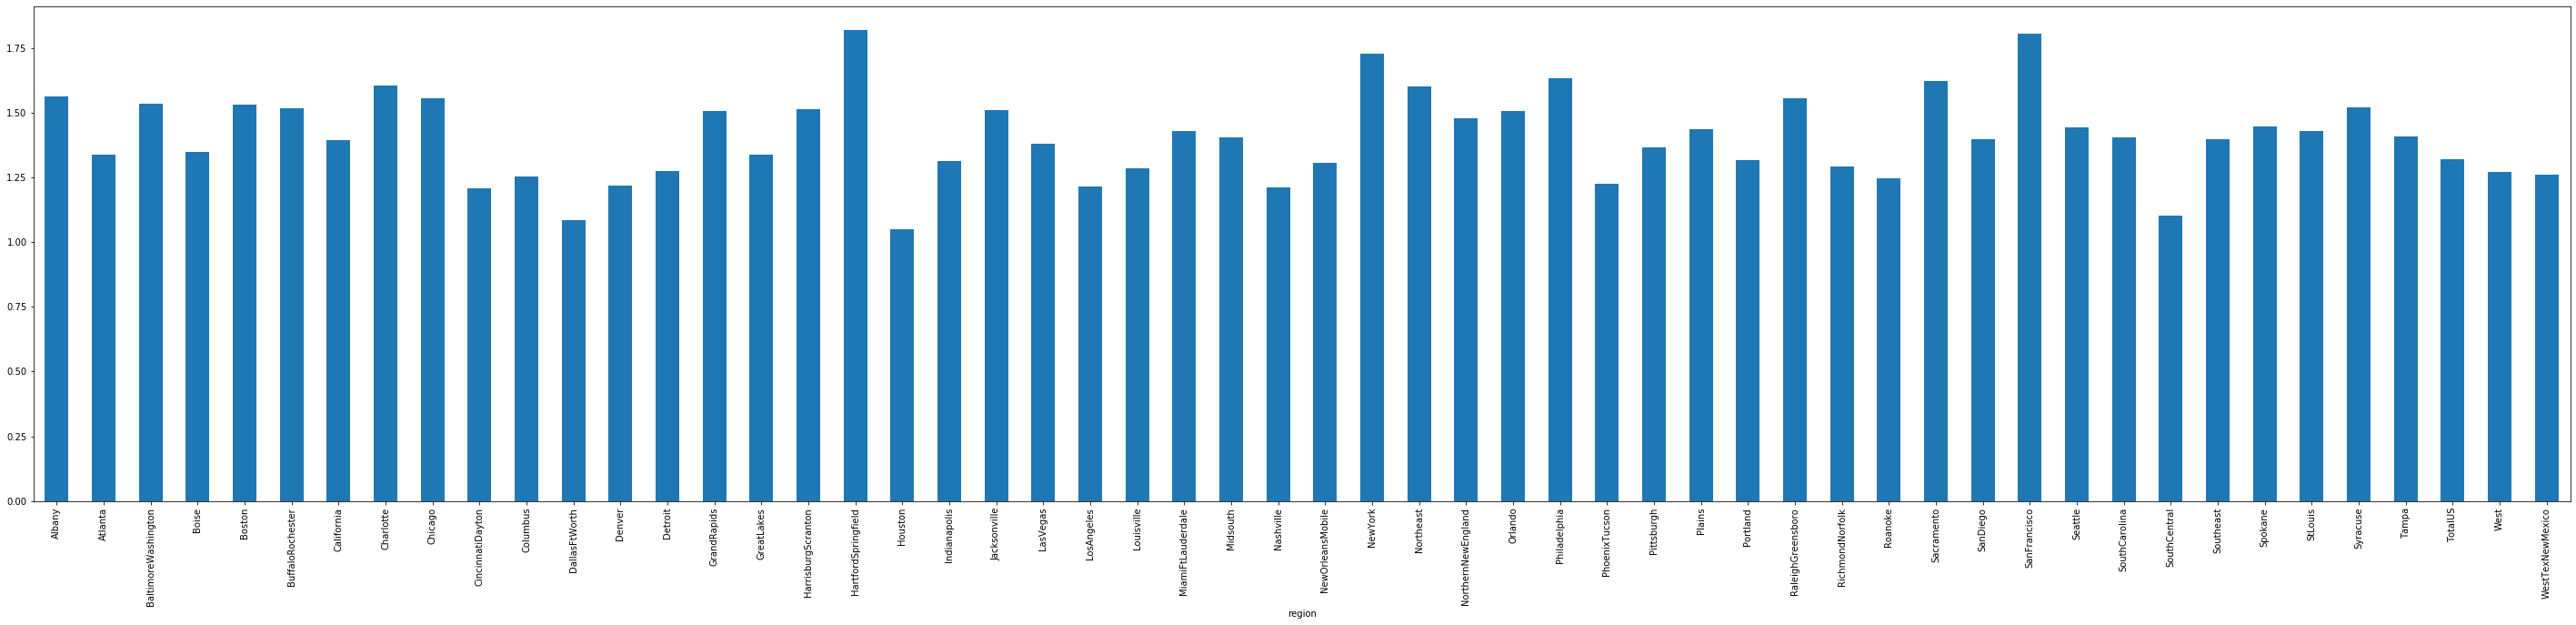

In [111]:
avocado_prices.plot.bar(figsize=(50,10))

In [113]:
avocado_prices_type=df.groupby(['region', 'type'])['AveragePrice'].mean()
#Let's compare average prices for organic and non-organic avocados according to each region.


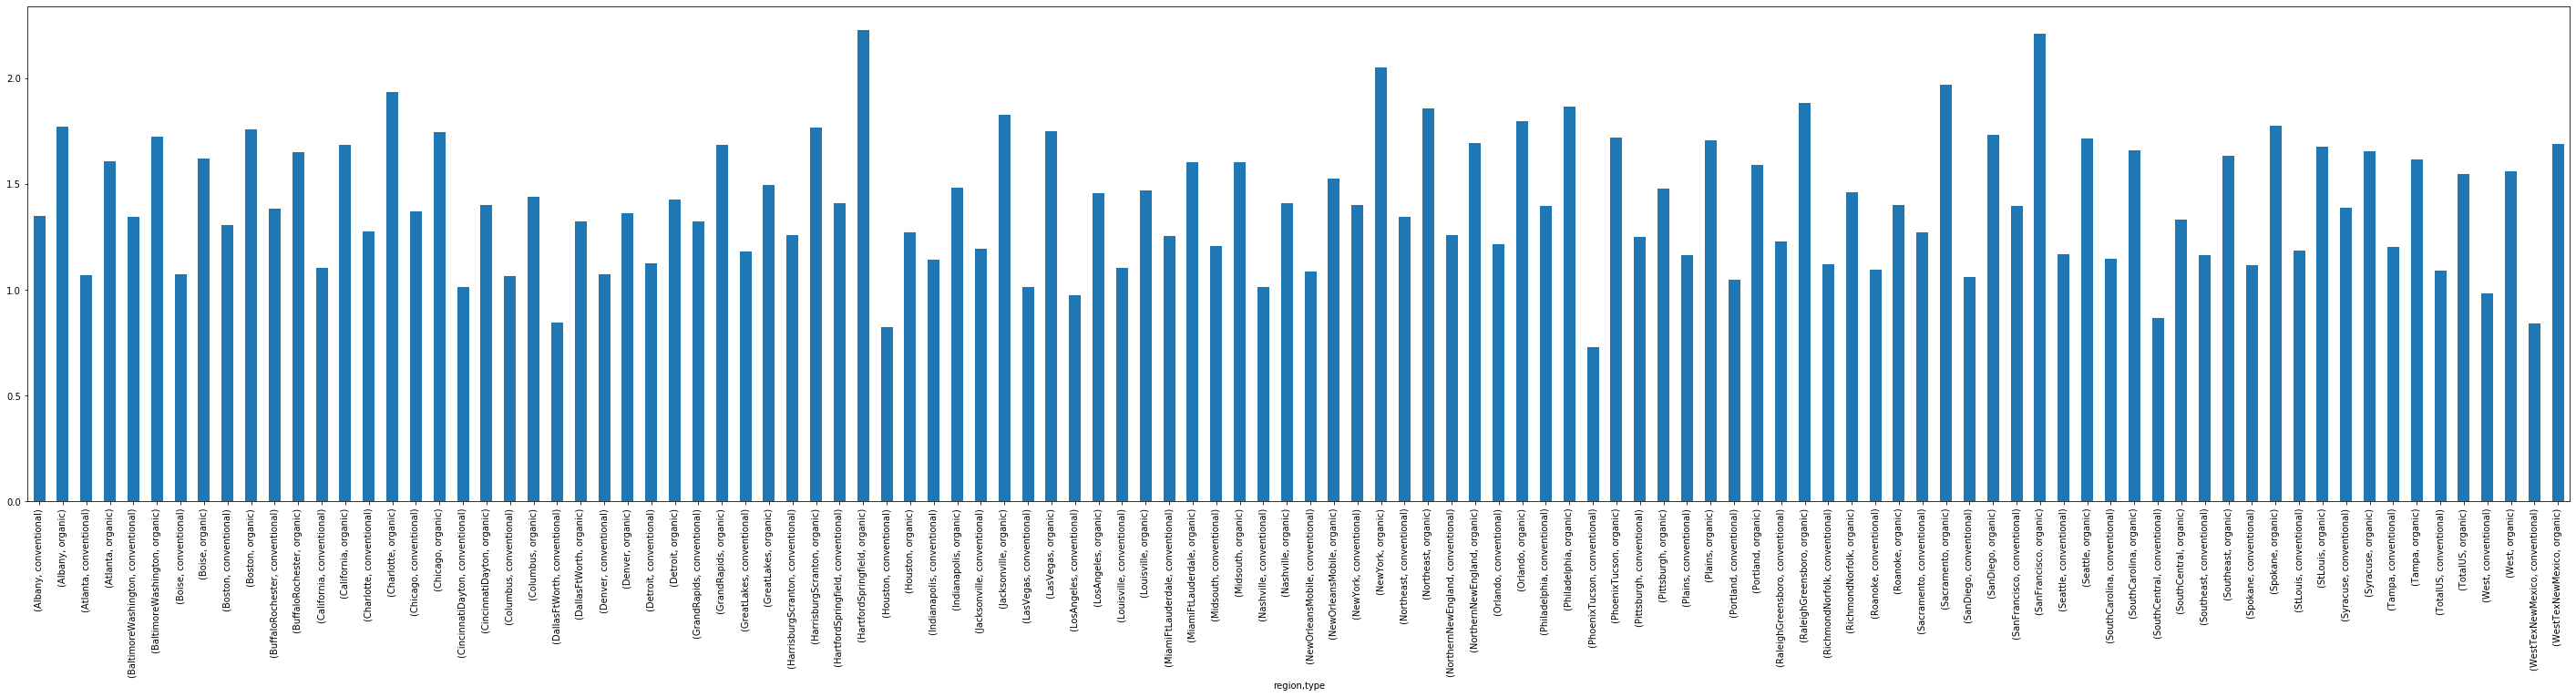

In [112]:
avocado_prices_type.plot.bar(figsize=(50,10))

Some insights: 
1. Hartford Springfield has the most expensive avocados on average with San Francisco being a close second.
2. When we compare organic vs. non-organic average prices, we see that Hartford Springfield also has the most expensive organic avocados on average but not the most expensive non-organic avocados.
3. Phoenix Tuscon seems to be the place to go for the cheapest non-organic avocados on average.
4. Dallas FtWorth seems to be the place to go for the cheapest organic avocados on average.
